In [50]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

In [51]:
df = pd.read_csv('fcc-forum-pageviews.csv')
df['date'] = pd.to_datetime(df['date'])
df = df.set_index('date')

In [52]:
df = df[(df['value'] > df['value'].quantile(0.025)) & (df['value'] < df['value'].quantile(0.975))]
df

,value
date,
2016-05-19,19736
2016-05-26,18060
2016-05-27,19997
2016-05-28,19044
2016-05-29,20325
...,...
2019-11-24,138875
2019-11-29,171584
2019-11-30,141161


<Axes: title={'center': 'Daily freeCodeCamp Forum Page Views 5/2016-12/2019'}, xlabel='Date', ylabel='Page Views'>

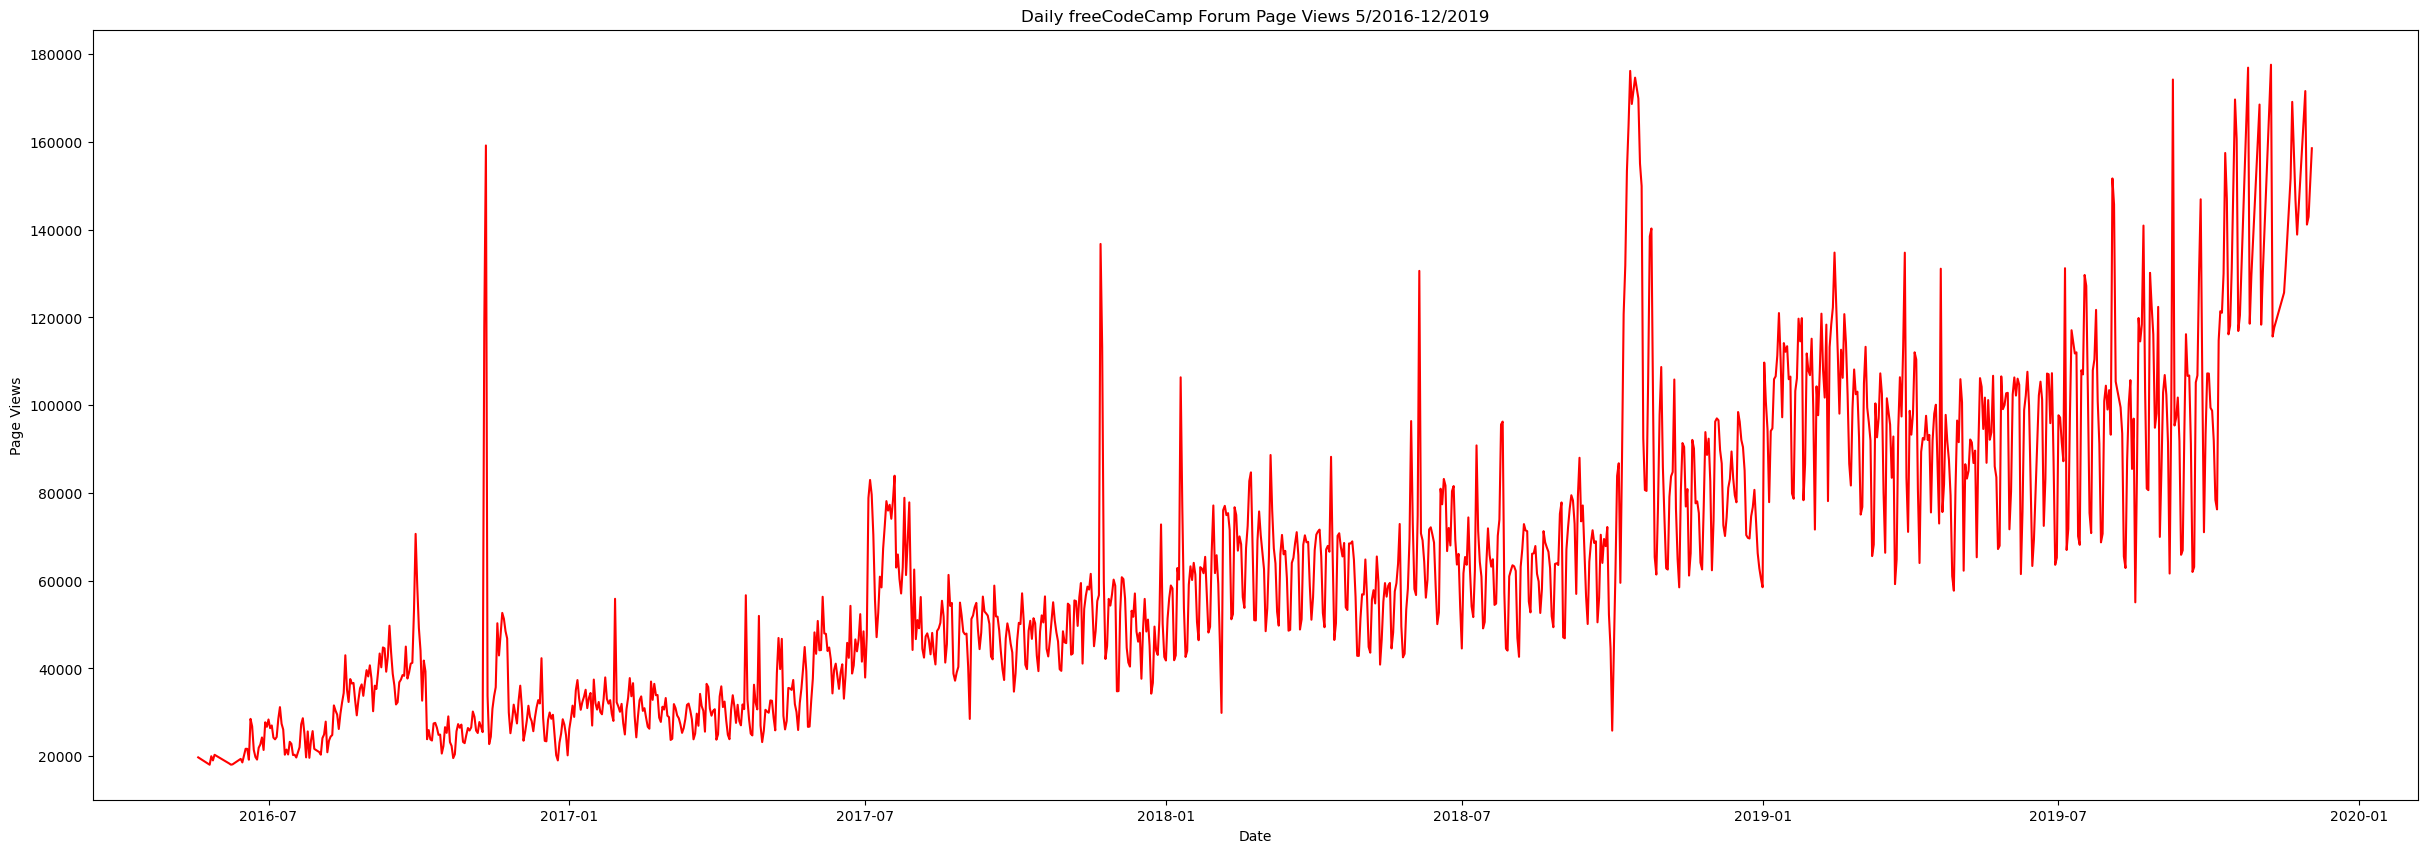

In [53]:
fig, ax = plt.subplots(figsize=(30, 10), dpi=100)
ax.set_title("Daily freeCodeCamp Forum Page Views 5/2016-12/2019")
ax.set_xlabel("Date")    
ax.set_ylabel("Page Views")
sns.lineplot(df,x = 'date',y = 'value',color = 'r')

In [35]:
print(df)

             value
date              
2016-05-19   19736
2016-05-26   18060
2016-05-27   19997
2016-05-28   19044
2016-05-29   20325
...            ...
2019-11-24  138875
2019-11-29  171584
2019-11-30  141161
2019-12-01  142918
2019-12-03  158549

[1238 rows x 1 columns]


In [54]:
df_bar = df.copy()
df_bar['Years'] = df_bar.index.year
df_bar['Months'] = df_bar.index.month_name()
df_bar

,value,Years,Months
date,,,
2016-05-19,19736,2016,May
2016-05-26,18060,2016,May
2016-05-27,19997,2016,May
2016-05-28,19044,2016,May
2016-05-29,20325,2016,May
...,...,...,...
2019-11-24,138875,2019,November
2019-11-29,171584,2019,November
2019-11-30,141161,2019,November


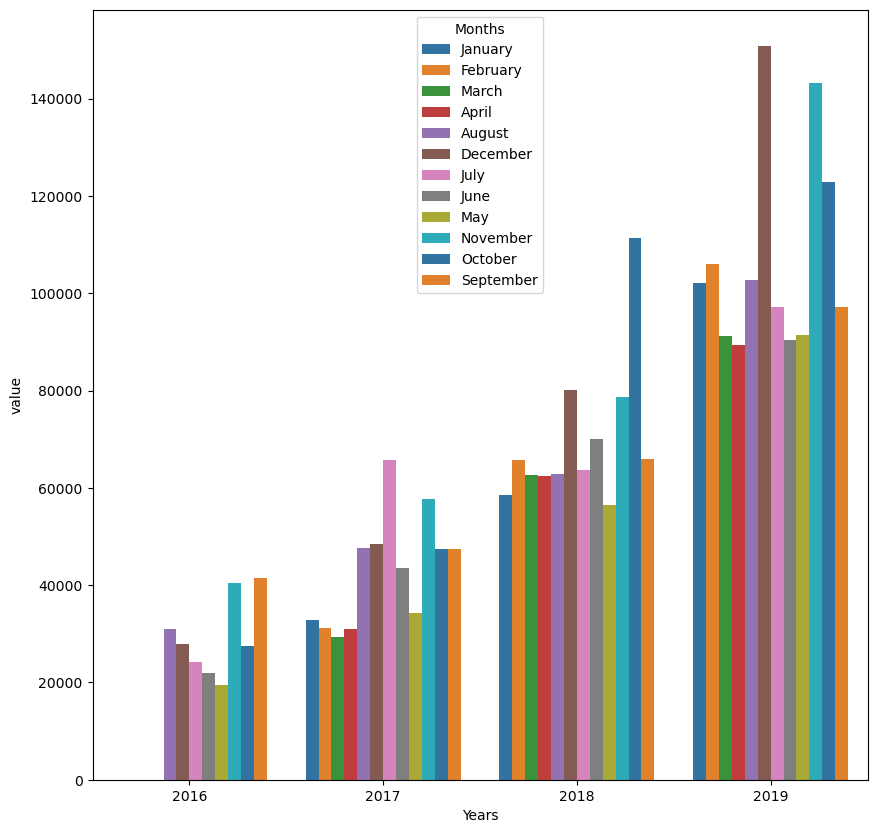

In [72]:
tmp = pd.DataFrame()
tmp = pd.DataFrame(df_bar.groupby(["Years", "Months"]).mean().round())
tmp = tmp.reset_index()

missing_data = {
        "Years": [2016, 2016, 2016, 2016],
        "Months": ['January', 'February', 'March', 'April'],
        "Average Page Views": [0, 0, 0, 0]
    }

tmp = pd.concat([pd.DataFrame(missing_data), tmp])

fig, ax = plt.subplots(figsize=(10, 10), dpi=100)
ax.set_xlabel("Years")    
ax.set_ylabel("Average Page Views")
chart = sns.barplot(data=tmp, x="Years", y="value", hue="Months", palette="tab10")


In [73]:
df_box = df.copy()
df_box.reset_index(inplace=True)
df_box['year'] = [d.year for d in df_box.date]
df_box['month'] = [d.strftime('%b') for d in df_box.date]

df_box

,date,value,year,month
0,2016-05-19,19736,2016,May
1,2016-05-26,18060,2016,May
2,2016-05-27,19997,2016,May
3,2016-05-28,19044,2016,May
4,2016-05-29,20325,2016,May
...,...,...,...,...
1233,2019-11-24,138875,2019,Nov
1234,2019-11-29,171584,2019,Nov
1235,2019-11-30,141161,2019,Nov
1236,2019-12-01,142918,2019,Dec


Text(0, 0.5, 'Page Views')

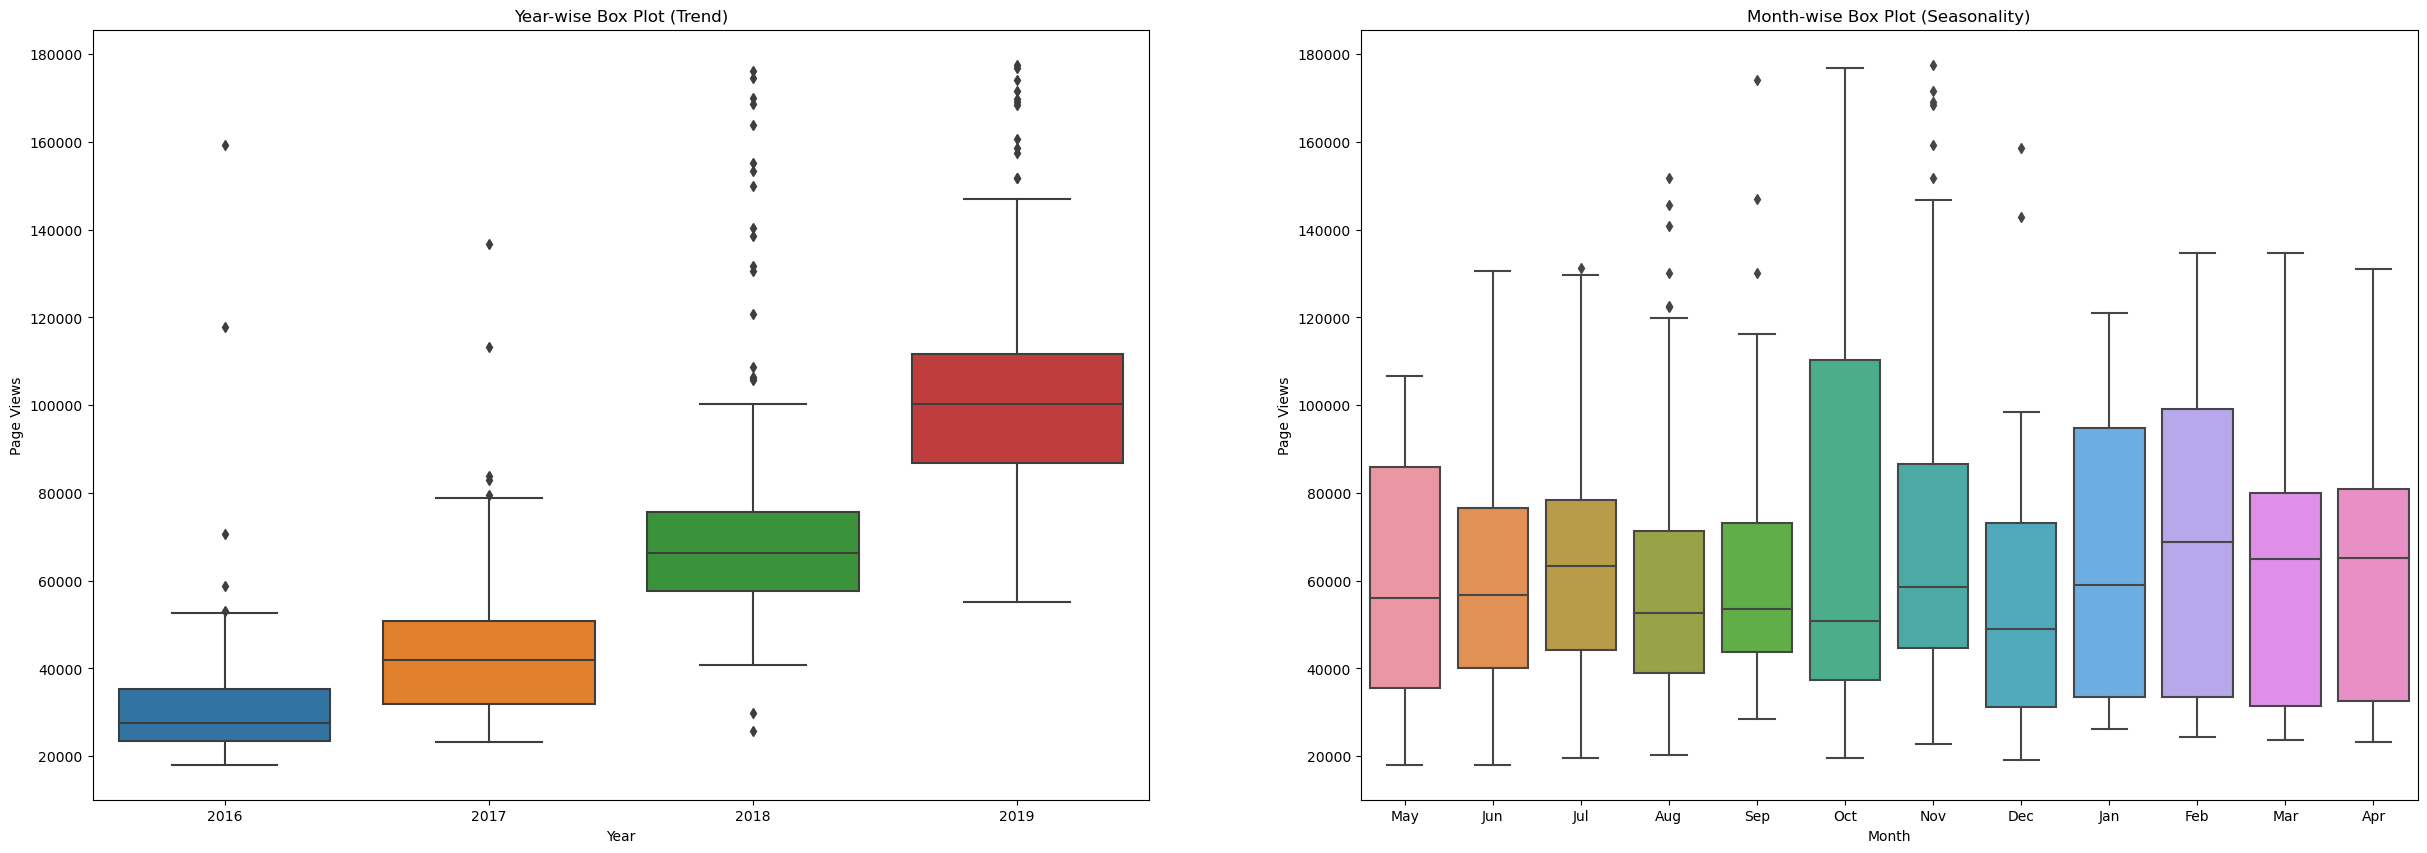

In [76]:
fig , (ax1,ax2) = plt.subplots(1,2,figsize = (30,10),dpi = 100)

sns.boxplot(df_box, x = 'year', y = 'value', ax=ax1)
ax1.set_title('Year-wise Box Plot (Trend)')
ax1.set_xlabel('Year')
ax1.set_ylabel('Page Views')

sns.boxplot(df_box, x = 'month', y = 'value', ax=ax2)
ax2.set_title('Month-wise Box Plot (Seasonality)')
ax2.set_xlabel('Month')
ax2.set_ylabel('Page Views')